# Statistic Test
隨機生成兩筆N(0,1)數據，測試以下檢定：
* K-S mean
* Epps-Singleton 
* t-test
* Levene

In [1]:
import numpy as np
from scipy import stats

In [41]:
rng = np.random.default_rng(42)
num=100000
x = rng.normal(0,1,num)
y = rng.normal(0,1,num)

In [42]:
# H_0: the stat. are the same
# H_a: the stat. are signeficantly different
# p>0.05 => stat. have no difference
# p<0.05 => reject H_0 => stat. are different
#---------------


### K-S test
ks_stat, ks_p = stats.ks_2samp(x,y)

### Epps-Singleton test (distribution)
es_stat, es_p = stats.epps_singleton_2samp(x,y)

### t-test (mean value)
tt_stat, tt_p = stats.ttest_ind(x,y,equal_var=False)

### Levene test (varience)
lev_stat, lev_p = stats.levene(x,y)

In [43]:
# Resultss

print("Kolmogorov–Smirnov test: stat=%.4f, p=%.4f" % (ks_stat, ks_p))
print("Epps–Singleton test:     stat=%.4f, p=%.4f" % (es_stat, es_p))
print("t-test (means):          stat=%.4f, p=%.4f" % (tt_stat, tt_p))
print("Levene (variances):      stat=%.4f, p=%.4f" % (lev_stat, lev_p))

Kolmogorov–Smirnov test: stat=0.0059, p=0.0635
Epps–Singleton test:     stat=3.3459, p=0.5017
t-test (means):          stat=-1.5498, p=0.1212
Levene (variances):      stat=0.0005, p=0.9819


In [44]:
import matplotlib.pylab as plt

In [45]:
def ecdf(arr):
    a = np.sort(arr)
    n = a.size
    y = np.arange(1,n+1)/n
    
    return a, y

In [46]:
xs, Fx = ecdf(x)
ys, Fy = ecdf(y)

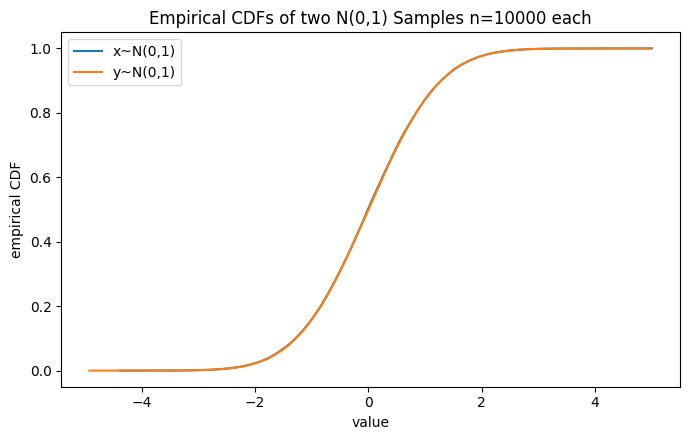

In [50]:
plt.figure(figsize=(7,4.5))
plt.step(xs, Fx, where="post", label="x~N(0,1)")
plt.step(ys, Fy, where="post", label="y~N(0,1)")
plt.xlabel("value")
plt.ylabel("empirical CDF")
plt.title("Empirical CDFs of two N(0,1) Samples n=10000 each")
plt.legend()
plt.tight_layout()
plt.show()

大數法則與中央極限定理：
num越來越大兩個cdf越重疊